 <div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        Introduction
</div>


 <div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
        Fake news or hoaxes refer to false or misleading information presented as news. The primary purpose of fake news is often to harm the reputation of a person or entity, or to generate revenue through advertising. Fake news may include false claims, factual distortions, or the dissemination of inaccurate information with a specific intent, often to manipulate public opinion or create confusion. This phenomenon can have serious implications for society, media, and democratic processes, making the detection and avoidance of fake news increasingly crucial in our ever-evolving information environment.
    </p>
</div>


Domain Knowledge :

1) Title - Title of the News

2) Text - Text or Content of the News

3) Label - Labelling the news as Fake or Real

 <div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       1. Import Libraries.
    </p>
</div>


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from collections import Counter
import re
import string

nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       2. Load Data
    </p>
</div>


In [4]:
try:  
    df = pd.read_csv('news.csv')
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    raise

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.columns 

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     3. Exploratioan Data
    </p>
</div>


In [8]:
df1 = df.copy()

In [9]:
df1.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

df1['label'] = df1['label'].replace('REAL', '0')
df1['label'] = df1['label'].replace('FAKE', '1')
df1['label'] = df1['label'].astype('int32')

df1.drop(columns=['title'], inplace=True)


In [10]:
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.replace('—', '') 
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

df1["clean_text"] = df1["text"].apply(clean)


In [11]:
df1.drop(columns=['text'], inplace=True)

In [12]:
df1["word_count"] = df1['clean_text'].str.split().str.len()
df1

,id,label,clean_text,word_count
0,8476,1,daniel greenfield shillman journal fellow free...,692
1,10294,1,googl pinterest digg linkedin reddit stumbleup...,238
2,3608,0,us secretari state john f kerri said monday st...,240
3,10142,1,kayde king kaydeek novemb lesson tonight de...,235
4,875,0,primari day new york frontrunn hillari clinton...,176
...,...,...,...,...
6330,4490,0,state depart told republican nation committe c...,376
6331,8062,1,‘p’ pb stand ‘plutocratic’ ‘pentagon’ post oct...,1312
6332,8622,1,antitrump protest tool oligarchi reform alwa...,1036
6333,4021,0,addi ababa ethiopia presid obama conven meet l...,650


In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
df1['score'] = df1['clean_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['sentiment'] = df1['score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['clean_text', 'score', 'sentiment']].head())

                                          clean_text   score sentiment
0  daniel greenfield shillman journal fellow free... -0.9978  negative
1  googl pinterest digg linkedin reddit stumbleup...  0.4404  positive
2  us secretari state john f kerri said monday st...  0.4404  positive
3   kayde king kaydeek novemb   lesson tonight de...  0.4902  positive
4  primari day new york frontrunn hillari clinton...  0.9765  positive


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Vizualization
    </p>
</div>


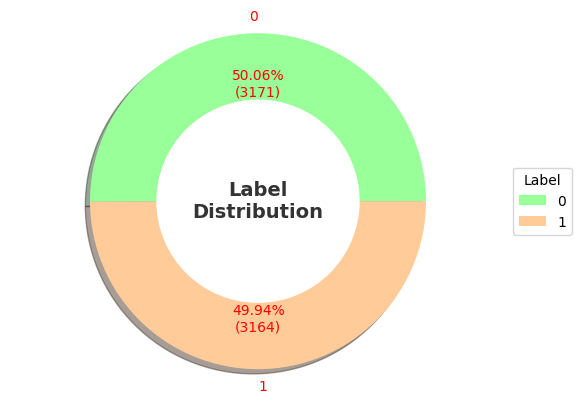

In [15]:
colors = ['#99ff99', '#ffcc99']

label_counts = df1.groupby("label").size()
explode = [0.0] * len(label_counts)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=label_counts,  
    labels=label_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(label_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,  
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Label\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(label_counts.index, title="Label", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()


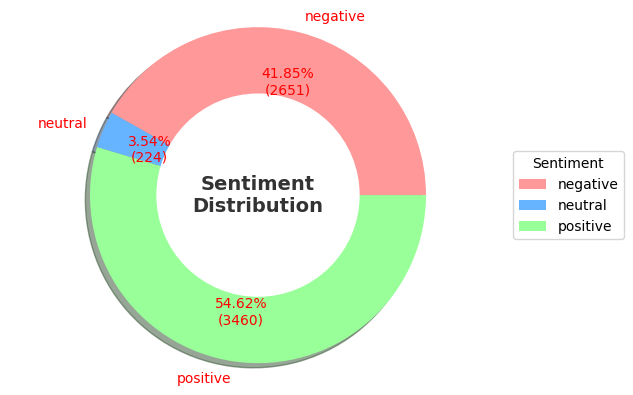

In [16]:
colors = ['#ff9999', '#66b3ff', '#99ff99']

explode = (0.0, 0, 0)  

sentiment_counts =df1.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

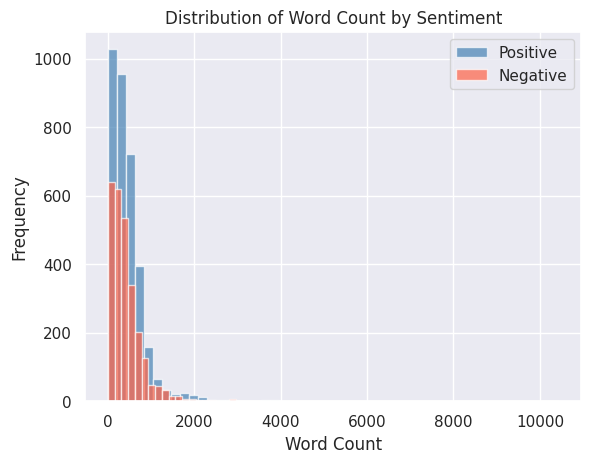

In [17]:
sns.set(style="darkgrid", palette="muted", color_codes=True)

positive_reviews = df1[df1["sentiment"] == 'positive']  
negative_reviews = df1[df1["sentiment"] == 'negative'] 

sns.distplot(positive_reviews['word_count'], color='steelblue', label='Positive', kde=False, hist_kws={'alpha': 0.7})
sns.distplot(negative_reviews['word_count'], color='tomato', label='Negative', kde=False, hist_kws={'alpha': 0.7})

plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      All Words
    </p>
</div>


In [18]:
df1['temp_list'] = df1['clean_text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(10), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Set2')

,Common_words,count
0,said,19020
1,trump,17635
2,clinton,14570
3,state,14156
4,would,12590
5,us,12073
6,one,11005
7,peopl,10917
8,like,9266
9,new,9051


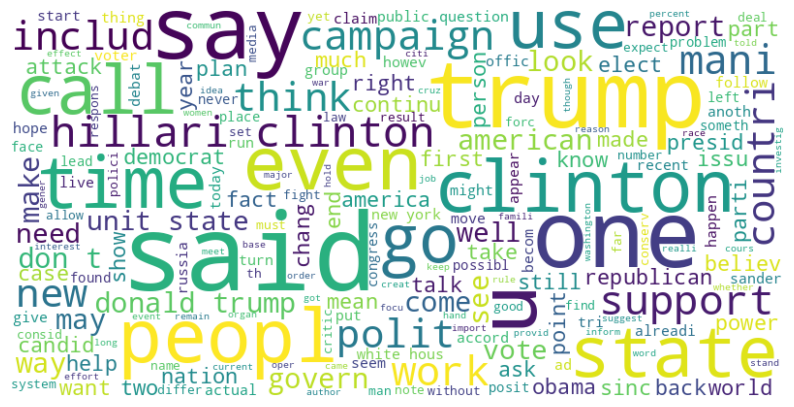

In [19]:
all_words = ' '.join(df1['clean_text'])

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)
                   
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [20]:
Positive_sent = df1[df1['sentiment'] == 'positive']
Negative_sent = df1[df1['sentiment'] == 'negative']
Neutral_sent = df1[df1['sentiment'] == 'neutral']

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Positive Words
    </p>
</div>


In [21]:
top = Counter([item for sublist in df1[df1['sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Set2')

,Common_words,count
0,trump,11956
1,said,10571
2,clinton,9875
3,state,8475
4,would,7578
5,republican,6500
6,one,6445
7,like,6107
8,peopl,6013
9,us,5876


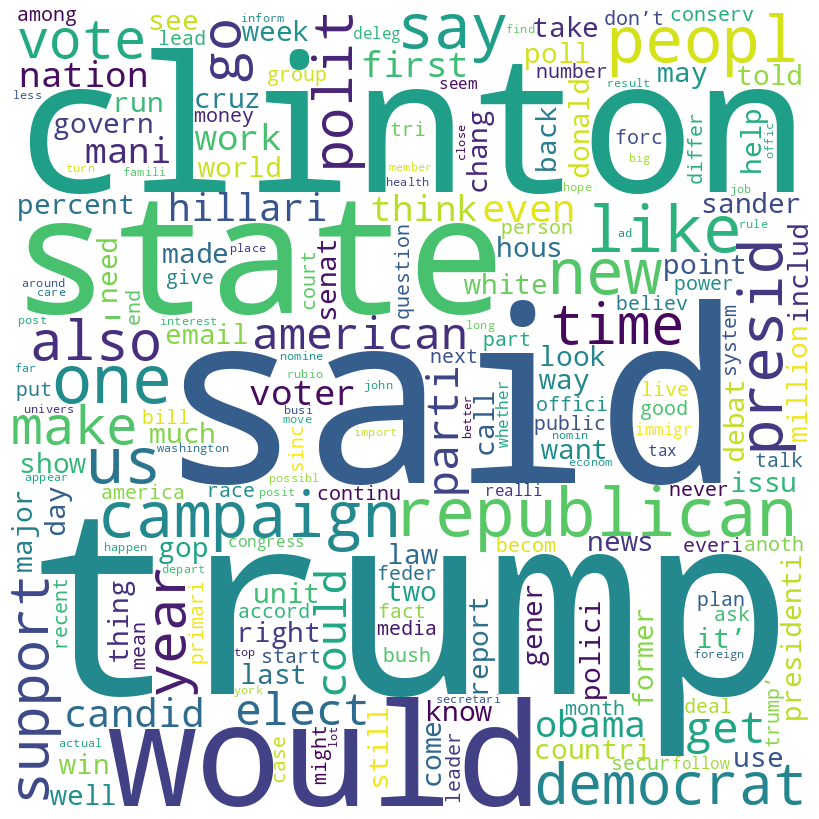

In [22]:
positive_words = [item for sublist in df1[df1['sentiment'] == 'positive']['temp_list'] for item in sublist]

word_counter = Counter(positive_words)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(['common', 'stopwords', 'you', 'may', 'want', 'to', 'add', 'custom', 'stop', 'words']), 
                min_font_size = 10).generate_from_frequencies(word_counter)
                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Neutral Words
    </p>
</div>


In [23]:
top = Counter([item for sublist in df1[df1['sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Set2')

,Common_words,count
0,clinton,147
1,said,129
2,trump,110
3,presid,80
4,hillari,78
5,would,76
6,vote,75
7,state,73
8,elect,73
9,one,70


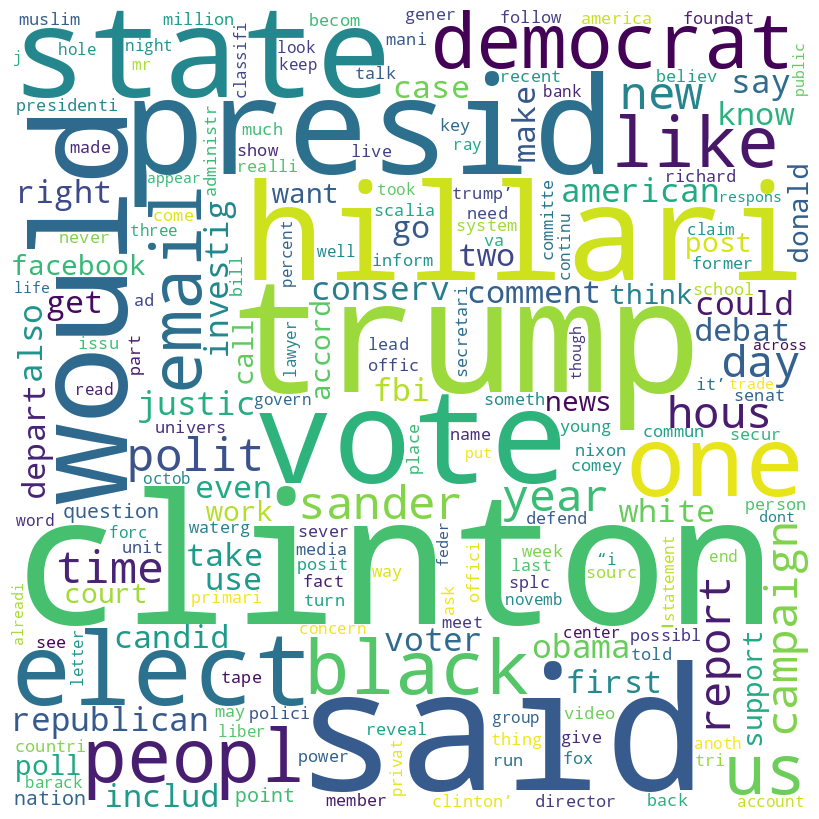

In [24]:
neutral_words = [item for sublist in df1[df1['sentiment'] == 'neutral']['temp_list'] for item in sublist]

word_counter = Counter(neutral_words)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(['common', 'stopwords', 'you', 'may', 'want', 'to', 'add', 'custom', 'stop', 'words']),
                      min_font_size=10).generate_from_frequencies(word_counter)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      Negative Words
    </p>
</div>


In [25]:
top = Counter([item for sublist in df1[df1['sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Set2')

,Common_words,count
0,said,8320
1,us,6140
2,state,5608
3,trump,5569
4,would,4936
5,peopl,4838
6,clinton,4548
7,one,4490
8,presid,3503
9,say,3405


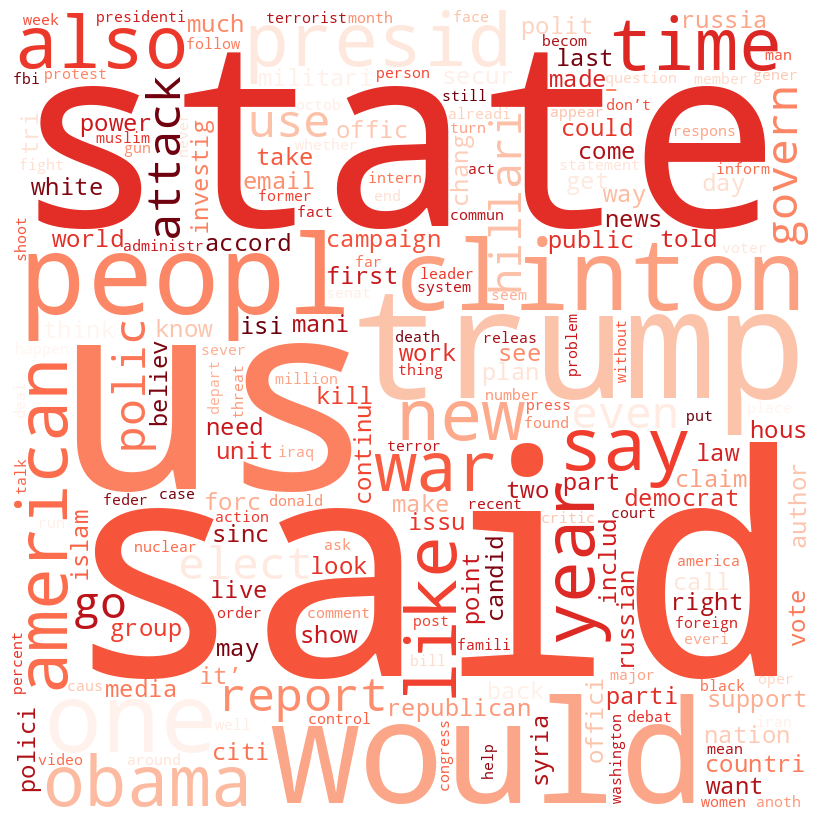

In [26]:
negative_words = [item for sublist in df1[df1['sentiment'] == 'negative']['temp_list'] for item in sublist]

word_counter = Counter(negative_words)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(['common', 'stopwords', 'you', 'may', 'want', 'to', 'add', 'custom', 'stop', 'words']),
                      min_font_size=10, colormap='Reds').generate_from_frequencies(word_counter)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
      4. Data Prepocessing
    </p>
</div>


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [28]:
df2 = df1.copy()

In [29]:
X = df2['clean_text'].values
y = df2['label'].values

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Split Data
    </p>
</div>


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       5. Modeling 
    </p>
</div>


<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
       Passive Agressive Classifier
    </p>
</div>



In [31]:
model_pa = make_imb_pipeline(TfidfVectorizer(), SMOTE(random_state=42), PassiveAggressiveClassifier())

In [32]:
model_pa.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('passiveaggressiveclassifier', PassiveAggressiveClassifier())])

In [33]:
y_pred = model_pa.predict(X_test)

In [34]:
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [35]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.9376479873717443
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       639
           1       0.94      0.93      0.94       628

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



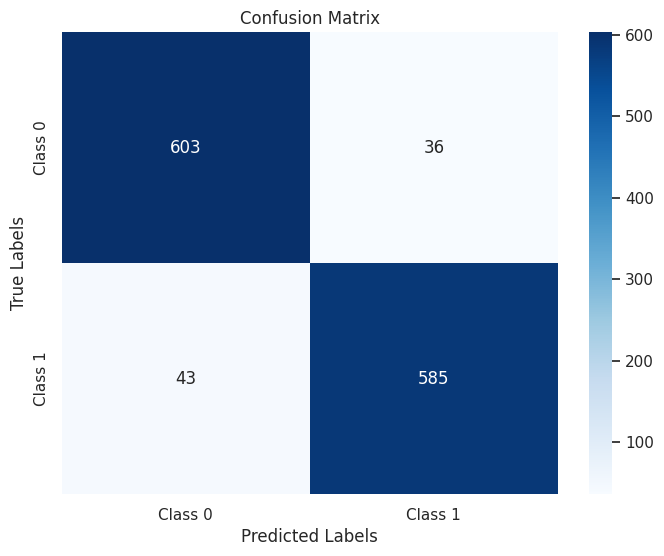

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<div style="background-color: #0074cc; padding: 10px; border-radius: 5px;">
    <p style="color: white; font-size: 14px; font-weight: bold;">
     6.Finish
    </p>
</div>



<div style="background-color: #ffffff; color: #000000; padding: 10px; border-radius: 5px;">
    <p style="font-size: 16px; font-weight: bold;">
       If you discovered this notebook to be useful or enjoyable, I'd greatly appreciate any upvotes.
    </p>
</div>


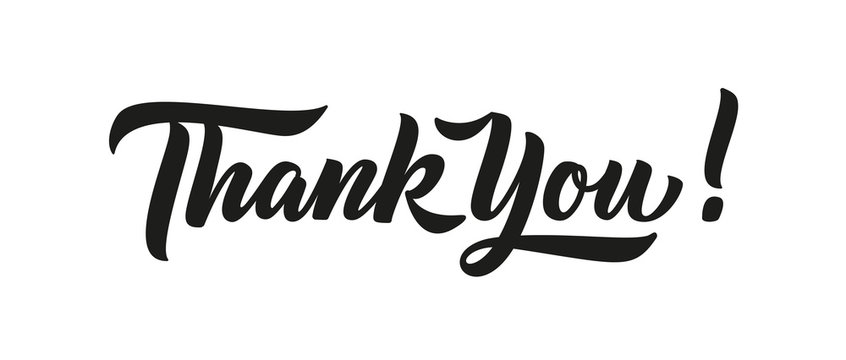